In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys # insert here the directory in which you have saved the file AppliedStatistics.py
sys.path.append(r"C:\Users\angelo\Documents\Python Scripts\AppliedStatisticsRoutines")
sys.path.append(r"C:\Users\angelo\Documents\ownCloud\Python Scripts\AppliedStatisticsRoutines")
sys.path.append(r"W:\TH-Valleriani\AngeloSynchFold\Python Scripts\AppliedStatisticsRoutines")
sys.path.append(r"C:\MyDirectory\AppliedStatisticsRoutines")
import AppliedStatistics as appst
import importlib

*** Welcome to AppliedStatistics ***

Author: Angelo Valleriani
Affiliation: Max Planck Institute of Colloids and Interfaces
Contact: angelo.valleriani@mpikg.mpg.de
License: unlicensed (http://unlicense.org/)

Best use as: >>>import AppliedStatistics as appst

You are using AppliedStatistics version 2.1.2


#### References:

All exercise and data are taken from: 

Hogg, Tanis, Zimmerman, "Probability and Statistical Inference", Tenth Edition, Pearson

## Interval Estimation

### Estimation of one quantile

Note that the point estimation of quantiles, and thus also the interval estimations, can give different results depending on the software used. The reason is that there are several competing definitions for the quantiles (except for the median, which is always defined in the same way). The method implemented in this course and in teh AppliedStatistics programs is sometimes called Weibul algorithm, as it was explained in the lectures. An alternative algorithms that I have implemented for the probability plot is the Filliben algorithm. This was discussed in the notebook of Lecture 2, in the section "Quantiles and probability plots".

#### Exercise 18

A biologist is interested in estimating the median length of the front legs of certain male spiders. To provide such an estimate, she collects $𝑁 = 20$ spiders and measures their legs. On the basis of this data, she should obtain the two-sided 95% confidence interval for the median.

In [2]:
#7.5-5
data = pd.read_csv("Exercise18.csv") # male spiders
data.head()

mm
0  15.10
1  13.55
2  15.75
3  20.00
4  15.45

In [3]:
x = np.array(data["mm"])
N = len(x)
print("The sample size is N =", N)

The sample size is N = 20


In [4]:
from scipy.stats import norm
p = 0.5 # we are interested in the median
alpha = 0.05 # we look for a two-sided 95% confidence interval
z_a2 = -norm.ppf(alpha/2)

First we find the confidence interval for the proportion p = 0.5

In [5]:
err = z_a2*np.sqrt(p*(1-p)/N)
print("The error is:", round(err,2))
pL = p - err
pU = p + err
print("pL = ", round(pL,2))
print("pU = ", round(pU,2))

The error is: 0.22
pL =  0.28
pU =  0.72


Now we look for the quantiles corresponding to pL, p and pU

In [6]:
# get the order statistics
y = np.sort(x)
print("The order statistics is:")
print(list(y))
print()
quantiles = []
for order in [pL, p, pU]:
    j = int(order*(N+1))
    r = order*(N+1) - j
    print("Take the element",j," and add the rest ", round(r,2))
    qp = y[j-1] +r*(y[j]-y[j-1]) # use j-1 because python counts from 0
    quantiles.append(qp)

print("The point estimate of the median is:", round(quantiles[1],2), "mm")
print("The two-sided "+str((1-alpha)*100)+"% confindece interval for the median is:", \
      [round(quantiles[0],2),round(quantiles[2],2)], "mm")


The order statistics is:
[13.55, 13.6, 14.05, 15.1, 15.25, 15.4, 15.45, 15.75, 16.25, 16.4, 16.45, 16.65, 16.8, 16.95, 17.05, 17.55, 17.75, 19.05, 19.05, 20.0]

Take the element 5  and add the rest  0.9
Take the element 10  and add the rest  0.5
Take the element 15  and add the rest  0.1
The point estimate of the median is: 16.42 mm
The two-sided 95.0% confindece interval for the median is: [15.38, 17.1] mm


The next command uses a more precise (exact) estimate of the confidence interval for the proportion 0.5 to derive the confidence interval for the population median. This is implemented in the routine appst.percentile() when giving conf_int = True and ci_exact = True.

In [7]:
spiders = appst.percentile(X=x,P=[0.5],conf_int = True, alpha = 0.05, \
                     ci_exact = True, sides = 'two', verbose = True, prec = 2)

The 50.0% percentile is given by  16.42
Its two-sided 95.0% confidence interval is (15.41, 17.03)
The precise confidence level is 0.95


#### Exercise 19

A biologist is interested in estimating the median length of the front legs of certain female spiders. To provide such an estimate, she collects $𝑁 = 20$ spiders and measure their legs. On the basis of this data, she should obtain the two-sided 95% confidence interval for the median.

In [8]:
# 7.5-8
data = pd.read_csv("Exercise19.csv") # female spiders
data.head()

mm
0  15.85
1  18.00
2  11.45
3  15.60
4  16.10

In [9]:
x = np.array(data["mm"])
N = len(x)
print("The sample size is N =", N)

The sample size is N = 20


In [10]:
from scipy.stats import norm
p = 0.5 # we are interested in the median
alpha = 0.05 # we look for a two-sided 95% confidence interval
z_a2 = -norm.ppf(alpha/2)

In [11]:
err = z_a2*np.sqrt(p*(1-p)/N)
pL = p - err
pU = p + err

In [12]:
# get the order statistics
y = np.sort(x)
print("The order statistics is:")
print(list(y))
print()
quantiles = []
for order in [pL, p, pU]:
    j = int(order*(N+1))
    r = order*(N+1) - j
    print("Take the element",j," and add the rest ", round(r,2))
    qp = y[j-1] +r*(y[j]-y[j-1]) # use j-1 because python counts from 0
    quantiles.append(qp)

print("The point estimate of the median is:", round(quantiles[1],2), "mm")
print("The two-sided "+str((1-alpha)*100)+"% confidence interval for the median is:", \
      [round(quantiles[0],2),round(quantiles[2],2)], "mm")


The order statistics is:
[11.45, 12.1, 12.85, 13.3, 14.15, 14.6, 14.8, 15.15, 15.25, 15.6, 15.85, 15.85, 16.1, 16.15, 16.2, 16.25, 16.6, 17.05, 18.0, 18.8]

Take the element 5  and add the rest  0.9
Take the element 10  and add the rest  0.5
Take the element 15  and add the rest  0.1
The point estimate of the median is: 15.72 mm
The two-sided 95.0% confidence interval for the median is: [14.55, 16.21] mm


In [13]:
spiders = appst.percentile(X=x,P=[0.5],conf_int = True, alpha = 0.05, \
                     ci_exact = True, sides = 'two', verbose = True, prec = 2)

The 50.0% percentile is given by  15.72
Its two-sided 95.0% confidence interval is (14.63, 16.19)
The precise confidence level is 0.95


#### Exercise 20

It seems that female spiders have shorter front legs than male spiders fof that specimen. How would we compare these two samples? How could we obtain an interval estimate of the difference of the medians? We can have a look at the distributions through a boxplot.

In [14]:
data_male = pd.read_csv("Exercise18.csv") # male spiders
data_female = pd.read_csv("Exercise19.csv") # male spiders

In [15]:
x_male = np.array(data_male).reshape(-1,)
x_female = np.array(data_female).reshape(-1,)

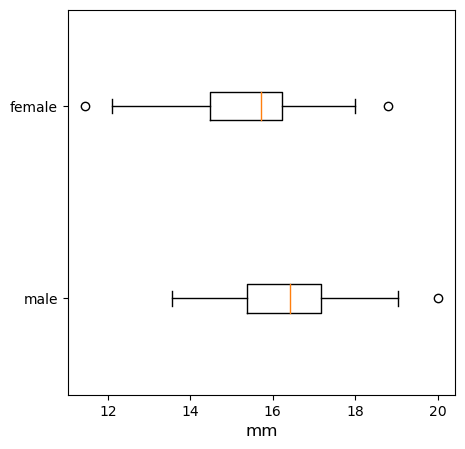

In [16]:
x = [x_male,x_female]
plt.figure(figsize=(5,5))
plt.boxplot(x, vert=False, labels=("male","female"))
plt.xlabel("mm", fontsize = 12)
plt.show()

We could now compute a confidence interval for the differences of the medians using a resampling method, like bootstrapping. Here one example, how to do this.

In [17]:
ntrials = 1000000 # set a large number compatible with precision and computational time
N = len(x_male) # account for possibly different sample sizes
M = len(x_female)
x1 = np.random.choice(x_male, size = (N, ntrials), replace = True) # creates ntrials new samples of size N
x2 = np.random.choice(x_female, size = (M, ntrials), replace = True) # creates ntrials new samples of size M
m1 = np.median(x1, axis = 0) # find the medians of each of the ntrials samples
m2 = np.median(x2, axis = 0)
delta_m = m1-m2 # get the ntrials differences of the bootstrapped medians
alpha = 0.05
# compute the quantiles corresponding to alpha/2, 0.5 and 1-alpha/2
results_L = appst.percentile(X=delta_m, P=[alpha/2,0.5, 1-alpha/2], conf_int = False, verbose = True)

The 2.5% percentile is given by  -0.425
The 50.0% percentile is given by  0.75
The 97.5% percentile is given by  1.95


## Conclusions

From this unit you have learned how to derive an interval estimate of a population quantile with a distribution-free method. We have seen the examples based on the median, which is also one of the most commonly used quantity to estimate centralities. Nevertheless, the method is applicable to any quantile.

There are many versions of this method, leading to slightly different results, which in general would not affect your conclusions. 

A note of caution is necessary though. When computing the confidence interval using the normal approximation for the proportions, we need to make sure that the sample is not too small for this approximation. Thus, when the sample size is small, rather use the routine provided here and choose the exact method. 

One final remark: as we have seen in the lecture, quantile corresponding to orders smaller than 1/(N+1) or larger than N/(N+1) do not exist. Therefore, if the boundaries of the confidence interval pass at least one of these limits, you can choose the minimum and the maximum of the sample as boundary, respectively. In this case, the confidence level will in general be smaller than the one sought for. 

Even if it is not discussed in the lecture, for a two-sided 95% confidence interval for the median, as sample of size N = 6 or larger is necessary in order to have meaninfgul results. Indeed, for smaller samples the confidence interval will include all sampled values, therefore making the interval estimate useless.

To create a confidence interval for the difference of the two medians, we can very easily involve a resampling method. This is very fast and leads to stable results when the number of bootstrapped samples is large. Also resampling has drawbacks when the sample is very small, but perhaps less drawbacks than other methods. 

Whatever the method is used, previous knowledge about the system may be crucial to a final decision about which method should be used.